In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean())).astype('int64')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True).rename(columns={'male':'Sex'})

df = pd.concat([df.drop('Embarked', axis=1), pd.get_dummies(df['Embarked'], drop_first=True).rename({})], axis=1)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.2500,0,1
1,1,1,0,38,1,0,71.2833,0,0
2,1,3,0,26,0,0,7.9250,0,1
3,1,1,0,35,1,0,53.1000,0,1
4,0,3,1,35,0,0,8.0500,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
train_prediction = lr.predict(X_train)
test_prediction = lr.predict(X_test)
test_prediction_proba = lr.predict_proba(X_test)[:,1]

# Performance Metrics

In [11]:
confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [12]:
print("Confusion Matrix for Train Data:\n", confusion_matrix_train)
print("\nConfusion Matrix for Test Data:\n", confusion_matrix_test)

Confusion Matrix for Train Data:
 [[326  48]
 [ 71 151]]

Confusion Matrix for Test Data:
 [[153  22]
 [ 33  87]]


In [13]:
tn = confusion_matrix_test[0][0]
tp = confusion_matrix_test[1][1]
fn = confusion_matrix_test[1][0]
fp = confusion_matrix_test[0][1]

print("True negative count:", tn)
print("True positive count:", tp)
print("False positive count:", fp)
print("False negative count:", fn)

True negative count: 153
True positive count: 87
False positive count: 22
False negative count: 33


### Accuracy

In [14]:
print("Accuracy value by the model: ",  lr.score(X_test, y_test))
print("Calculated accuracy value: ",  (tn + tp)/(fn + fp + tn + tp))
print("accuracy_score() value: ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model:  0.8135593220338984
Calculated accuracy value:  0.8135593220338984
accuracy_score() value:  0.8135593220338984


### Error Rate

In [15]:
print("Error rate: ",  1-accuracy_score(y_test, test_prediction))
print("Calculated error rate: ", (fn+fp)/(fn+fp+tn+tp))

Error rate:  0.18644067796610164
Calculated error rate:  0.1864406779661017


### Precision

In [16]:
print("Calculated precision value: ",  (tp)/(fp + tp))
print("precision_score() value: ",  precision_score(y_test, test_prediction))

Calculated precision value:  0.7981651376146789
precision_score() value:  0.7981651376146789


### Recall/Sensitivity

In [17]:
print("Calculated recall value: ",  (tp)/(tp + fn))
print("recall_score() value: ",  recall_score(y_test, test_prediction))

Calculated recall value:  0.725
recall_score() value:  0.725


### Specificity

In [18]:
print("Calculated specificity value: ",  (tn)/(tn + fp))

Calculated specificity value:  0.8742857142857143


### F1 Score

In [19]:
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.759825327510917
f1_score() value     :  0.759825327510917


### Classification Report

In [20]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



# ROC Curve (ROC/AUC)

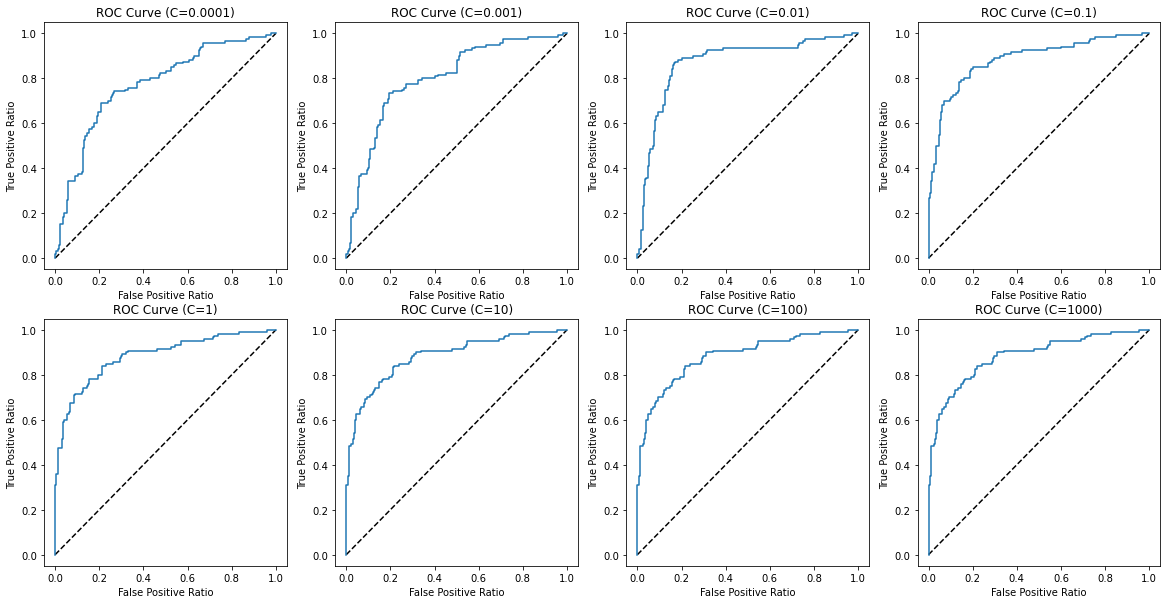

In [21]:
plt.figure(figsize=(20, 10))
for i in range(-4, 4, 1):
    plt.subplot(2, 4, i+5)
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, test_prediction_proba)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve (C={})'.format(10**i))

plt.show()

In [22]:
for i in range(-4, 4, 1):
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    print('AUC value (C={}): {:.5f}'.format((10**i), roc_auc_score(y_test, test_prediction_proba)))

AUC value (C=0.0001): 0.77233
AUC value (C=0.001): 0.80100
AUC value (C=0.01): 0.87176
AUC value (C=0.1): 0.88367
AUC value (C=1): 0.88424
AUC value (C=10): 0.88319
AUC value (C=100): 0.88295
AUC value (C=1000): 0.88310


# Precision/Recall Curve

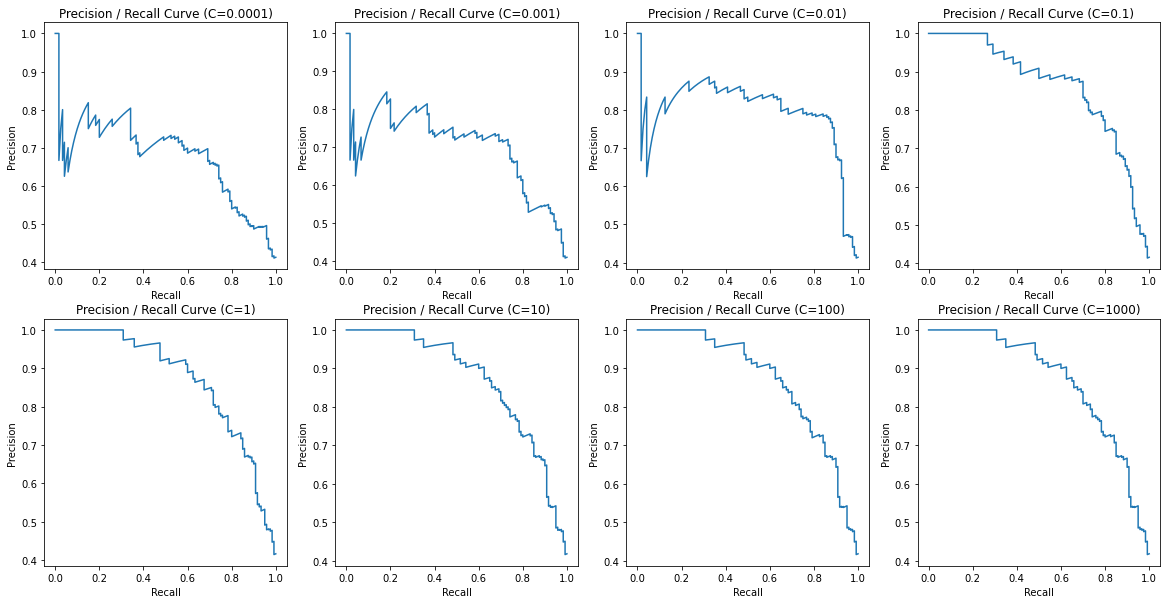

In [23]:
plt.figure(figsize=(20, 10))
for i in range(-4, 4, 1):
    plt.subplot(2, 4, i+5)
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)
    
    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision / Recall Curve (C={})'.format(10**i))


plt.show()